In [2]:
%pip install qiskit --quiet
%pip install qiskit-aer --quiet
%pip install matplotlib --quiet
%pip install pylatexenc --quiet


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import GlobalPhaseGate
from qiskit.circuit import Qubit
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

In [4]:
qa = QuantumRegister(3, 'a')
qb = QuantumRegister(3, 'b')
aux = QuantumRegister(1, 'aux')
z = QuantumRegister(1, 'z')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qa, qb, aux, z, cr)

qaRegs = qa[:]
qbRegs = qb[:]

# Creating the Quantum Table

/home/sum/Documents/QuantumDB/QuantumDB/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


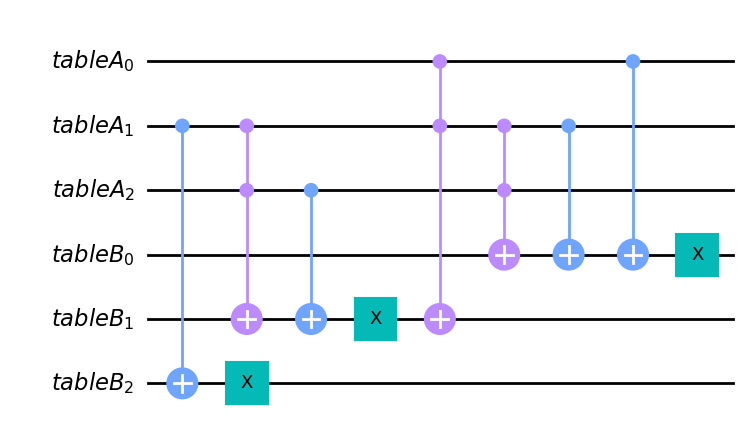

In [5]:
tableA = QuantumRegister(3, 'tableA')
tableB = QuantumRegister(3, 'tableB')
t1 = QuantumCircuit(tableA, tableB)

t1.cx(tableA[1], tableB[2])
t1.x(tableB[2])

t1.ccx(tableA[1], tableA[2], tableB[1])
t1.cx(tableA[2], tableB[1])
t1.x(tableB[1])
t1.ccx(tableA[0], tableA[1], tableB[1])

t1.ccx(tableA[1], tableA[2], tableB[0])
t1.cx(tableA[1], tableB[0])
t1.cx(tableA[0], tableB[0])
t1.x(tableB[0])


table1 = t1.to_gate(label='table1')
t1.draw(output='mpl')


## Performing a search (SELECT query)

110


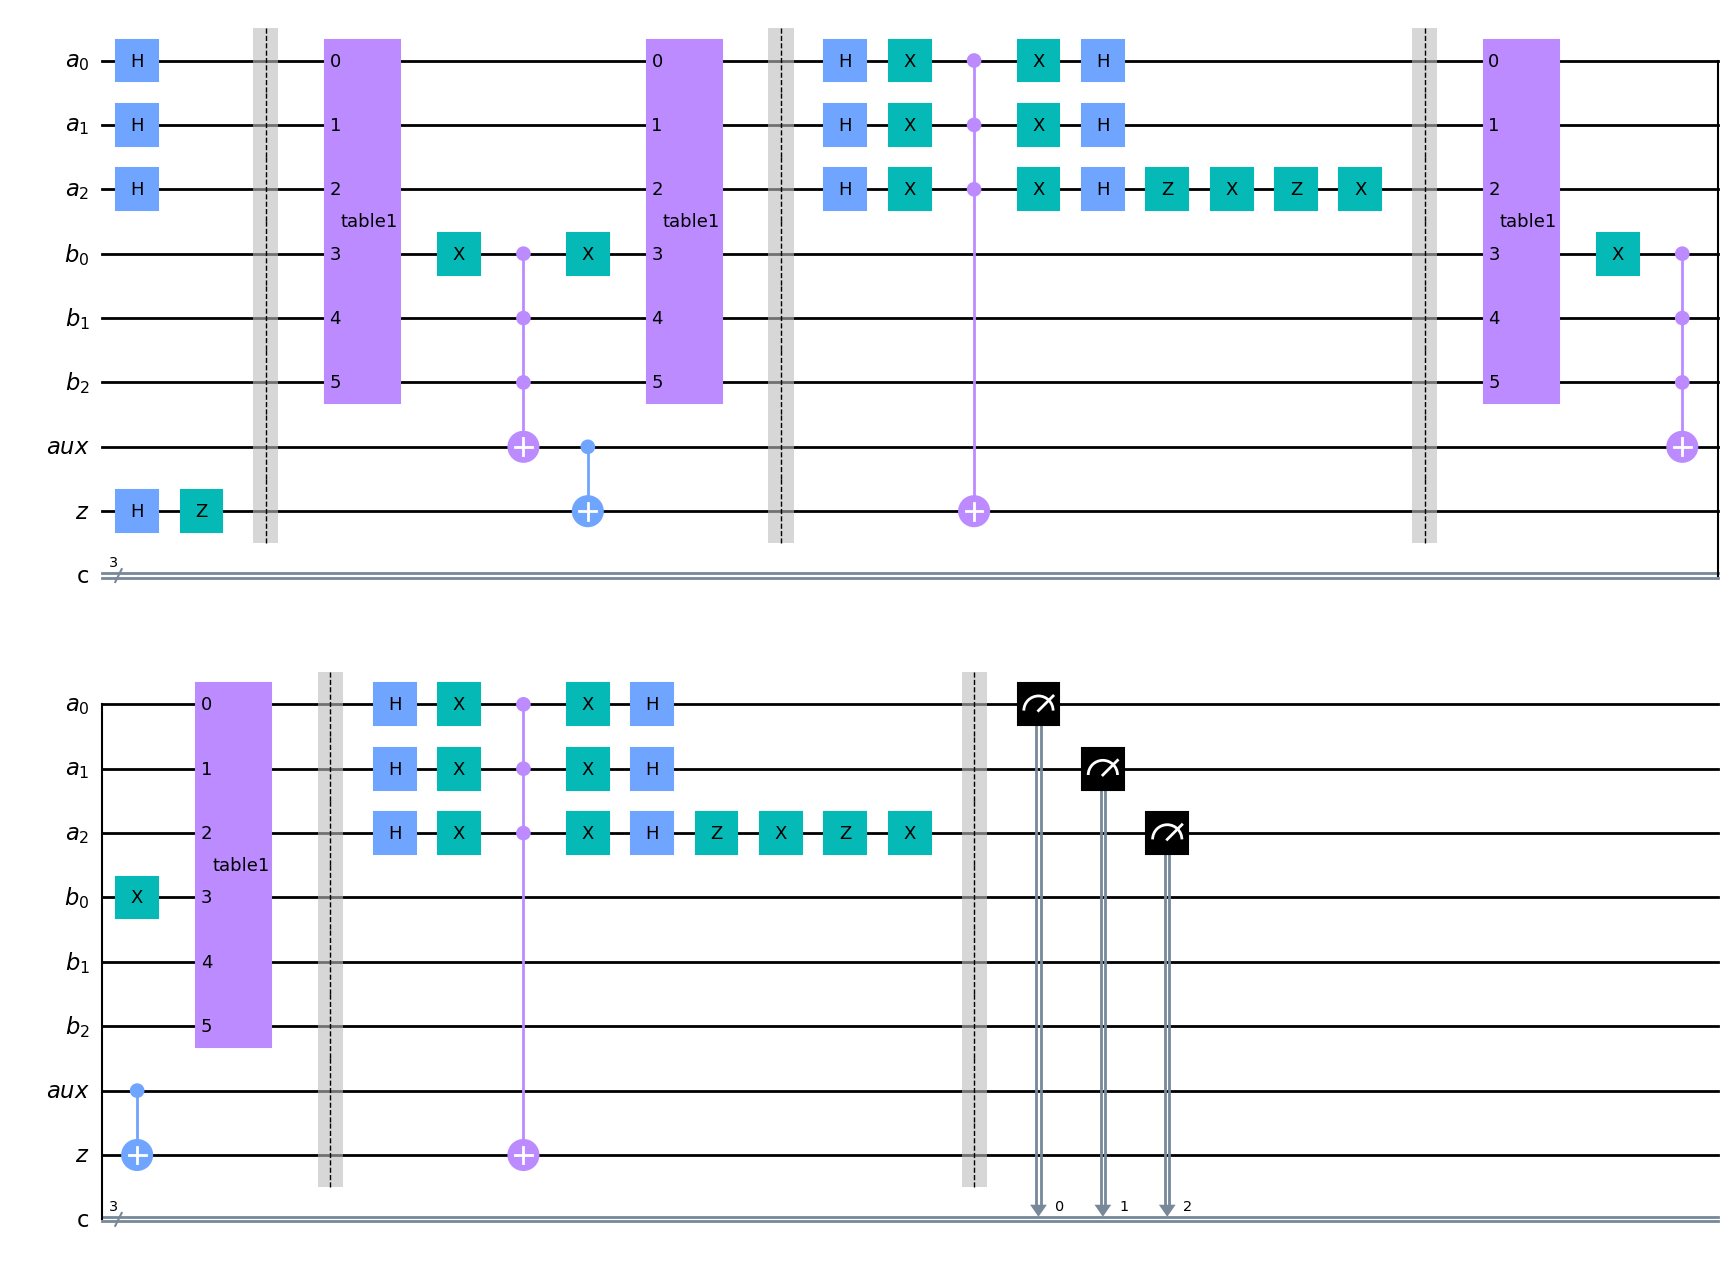

In [6]:
# Let's search for qb = 4, should get 101 (5) as output\
def search(num, doMeasurement=False):
    qa = QuantumRegister(3, 'a')
    qb = QuantumRegister(3, 'b')
    aux = QuantumRegister(1, 'aux')
    z = QuantumRegister(1, 'z')
    cr = ClassicalRegister(3, 'c')
    qc = QuantumCircuit(qa, qb, aux, z, cr)

    qaRegs = qa[:]
    qbRegs = qb[:]

    M = int(np.floor(np.pi/4 * np.sqrt(2**len(qaRegs))))
    binary = bin(num)[2:]
    binary = '0'*(len(qa)-len(binary)) + binary
    print(binary)

    qc.h(z)
    qc.z(z)
    qc.h(qaRegs)
    qc.barrier()
    for i in range(M):
        qc.append(table1, qaRegs[:] + qbRegs[:])
        for j in range(len(binary)):
            if binary[j] == '0':
                qc.x(qbRegs[len(binary)-j-1])

        qc.mcx(qbRegs, aux)

        for j in range(len(binary)):
            if binary[j] == '0':
                qc.x(qbRegs[len(binary)-j-1])

            
        qc.append(table1, qaRegs[:] + qbRegs[:])
        qc.cx(aux, z)
        qc.barrier()

        qc.h(qaRegs)
        qc.x(qaRegs)
        qc.mcx(qaRegs, z)
        qc.x(qaRegs)
        qc.h(qaRegs)
        qc.z(qaRegs[len(qaRegs)-1])
        qc.x(qaRegs[len(qaRegs)-1])
        qc.z(qaRegs[len(qaRegs)-1])
        qc.x(qaRegs[len(qaRegs)-1])
        qc.barrier()

    # qc.h(qa)
    # qc.x(qaRegs)
    qc.measure(qa, cr)

    if doMeasurement:
        backend = Aer.get_backend('qasm_simulator')
        job = execute(qc, backend, shots=1024)
        result = job.result()
        counts = result.get_counts(qc)
        return int(max(counts, key=counts.get), 2)

    return qc
    
searchCircuit = search(6)
searchCircuit.draw(output='mpl')

{'110': 4, '101': 4, '011': 5, '111': 2, '100': 4, '000': 5, '010': 3, '001': 23}


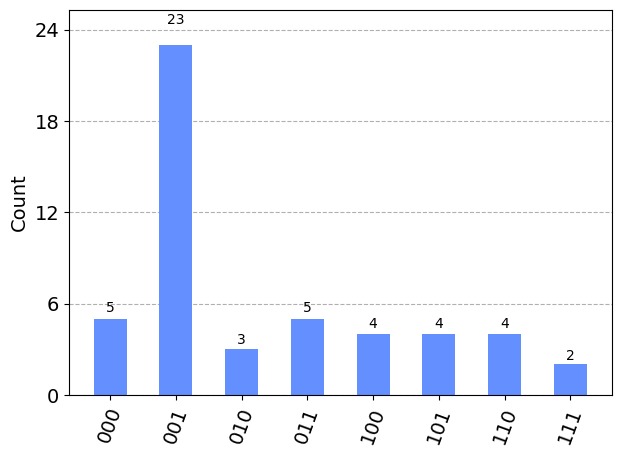

In [7]:
backend = Aer.get_backend('qasm_simulator')
job = execute(searchCircuit, backend, shots=50)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

## Performing an Insert (INSERT query)

/home/sum/Documents/QuantumDB/QuantumDB/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


{'0111': 113, '1011': 54, '0011': 66, '0001': 132, '1101': 60, '0110': 133, '1000': 64, '0101': 66, '0100': 131, '0000': 88, '0010': 58, '1010': 59}


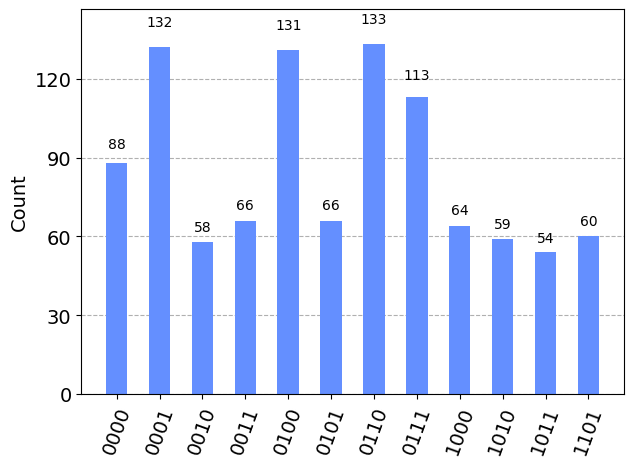

In [8]:
def insert():
    qa = QuantumRegister(3, 'a')
    qb = QuantumRegister(3, 'b')
    aux = QuantumRegister(1, 'aux')
    z = QuantumRegister(1, 'z')
    cr = ClassicalRegister(4, 'c')
    qc = QuantumCircuit(qa, qb, aux, z, cr)

    qaRegs = qa[:]
    qbRegs = qb[:]

    qc.h(qaRegs)
    qc.append(table1, qaRegs[:] + qbRegs[:])

    # Inserting 8 into table
    qa1 = QuantumRegister(1, 'a1')
    qb1 = QuantumRegister(1, 'b1')
    qc.add_register(qa1)
    qc.add_register(qb1)
    qaRegs += qa1[:]
    qbRegs += qb1[:]

    # Stage 1: Controlling on prev states
    qc.x(qaRegs)
    qc.mcx(qaRegs, aux)
    qc.x(qaRegs)

    qc.x(qaRegs[2:] + [qaRegs[0]])
    qc.mcx(qaRegs, aux)
    qc.x(qaRegs[2:] + [qaRegs[0]])

    qc.x(qaRegs[2:])
    qc.mcx(qaRegs, aux)
    qc.x(qaRegs[2:])

    qc.x([qaRegs[1], qaRegs[3]])
    qc.mcx(qaRegs, aux)
    qc.x([qaRegs[1], qaRegs[3]])

    qc.ch(aux, qaRegs[3])
    qc.barrier()

    # Stage 2
    qc.x(qaRegs)
    qc.mcx(qaRegs, aux)
    qc.x(qaRegs)

    qc.x(qaRegs[1:])
    qc.mcx(qaRegs, aux)
    qc.x(qaRegs[1:])

    qc.x(qaRegs[2:])
    qc.mcx(qaRegs, aux)
    qc.x(qaRegs[2:])

    qc.x(qaRegs[0:1] + [qaRegs[3]])
    qc.mcx(qaRegs, aux)
    qc.x(qaRegs[0:1] + [qaRegs[3]])

    qc.x([qaRegs[1], qaRegs[3]])
    qc.mcx(qaRegs, aux)
    qc.x([qaRegs[1], qaRegs[3]])

    qc.barrier()

    # Stage 3
    qc.x(qaRegs[0:3])
    qc.mcx(qaRegs[:] + aux[:], qbRegs[2])
    qc.x(qaRegs[0:3])

    # Stage 4
    qc.x(qaRegs[0:3])
    qc.mcx(qaRegs, aux)
    qc.x(qaRegs[0:3])

    qc.draw(output='mpl')
    qc.measure(qaRegs, cr)

    return qc

insertCircuit = insert()
insertCircuit.draw(output='mpl')

backend = Aer.get_backend('qasm_simulator')
job = execute(insertCircuit, backend, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)


## Creating a new Table

/home/sum/Documents/QuantumDB/QuantumDB/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


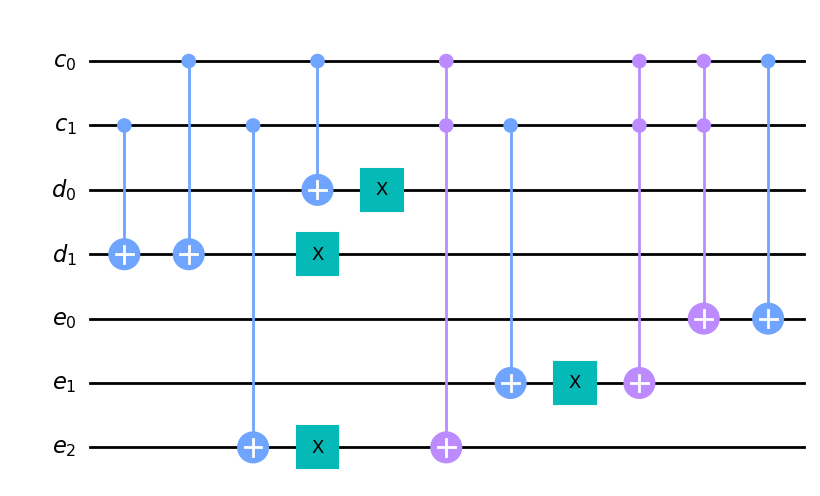

In [9]:
c = QuantumRegister(2, 'c')
d = QuantumRegister(2, 'd')
e = QuantumRegister(3, 'e')
t2 = QuantumCircuit(c, d, e)

t2.cx(c[1], d[1])
t2.cx(c[0], d[1])
t2.x(d[1])

t2.cx(c[0], d[0])
t2.x(d[0])

t2.cx(c[1], e[2])
t2.x(e[2])
t2.ccx(c[1], c[0], e[2])

t2.cx(c[1], e[1])
t2.x(e[1])
t2.ccx(c[1], c[0], e[1])

t2.ccx(c[1], c[0], e[0])
t2.cx(c[0], e[0])

table2 = t2.to_gate(label='table2')
t2.draw(output='mpl')



## Natural Join between Table 1 and Table 2 (SELECT + JOIN query)

{'000': 1024}


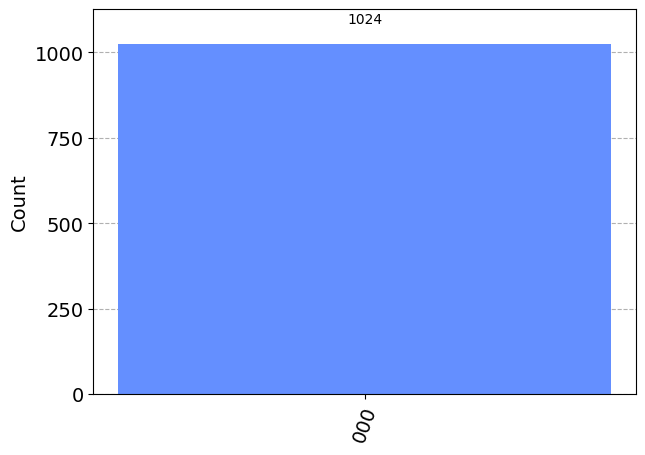

In [10]:
def test():
    c = QuantumRegister(2, 'c')
    d = QuantumRegister(2, 'd')
    e = QuantumRegister(3, 'e')
    b = QuantumRegister(3, 'b')
    aux = QuantumRegister(1, 'aux')
    z = QuantumRegister(1, 'z')
    cr = ClassicalRegister(3, 'cr')

    qc = QuantumCircuit(c, d, e, b, aux, z, cr)

    qc.x(c[0])
    qc.append(table2, c[:] + d[:] + e[:])
    qc.append(table1, e[:] + b[:])

    qc.measure(b, cr)

    return qc

testCircuit = test()
testCircuit.draw(output='mpl')

backend = Aer.get_backend('qasm_simulator')
job = execute(testCircuit, backend, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)


000


/home/sum/Documents/QuantumDB/QuantumDB/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


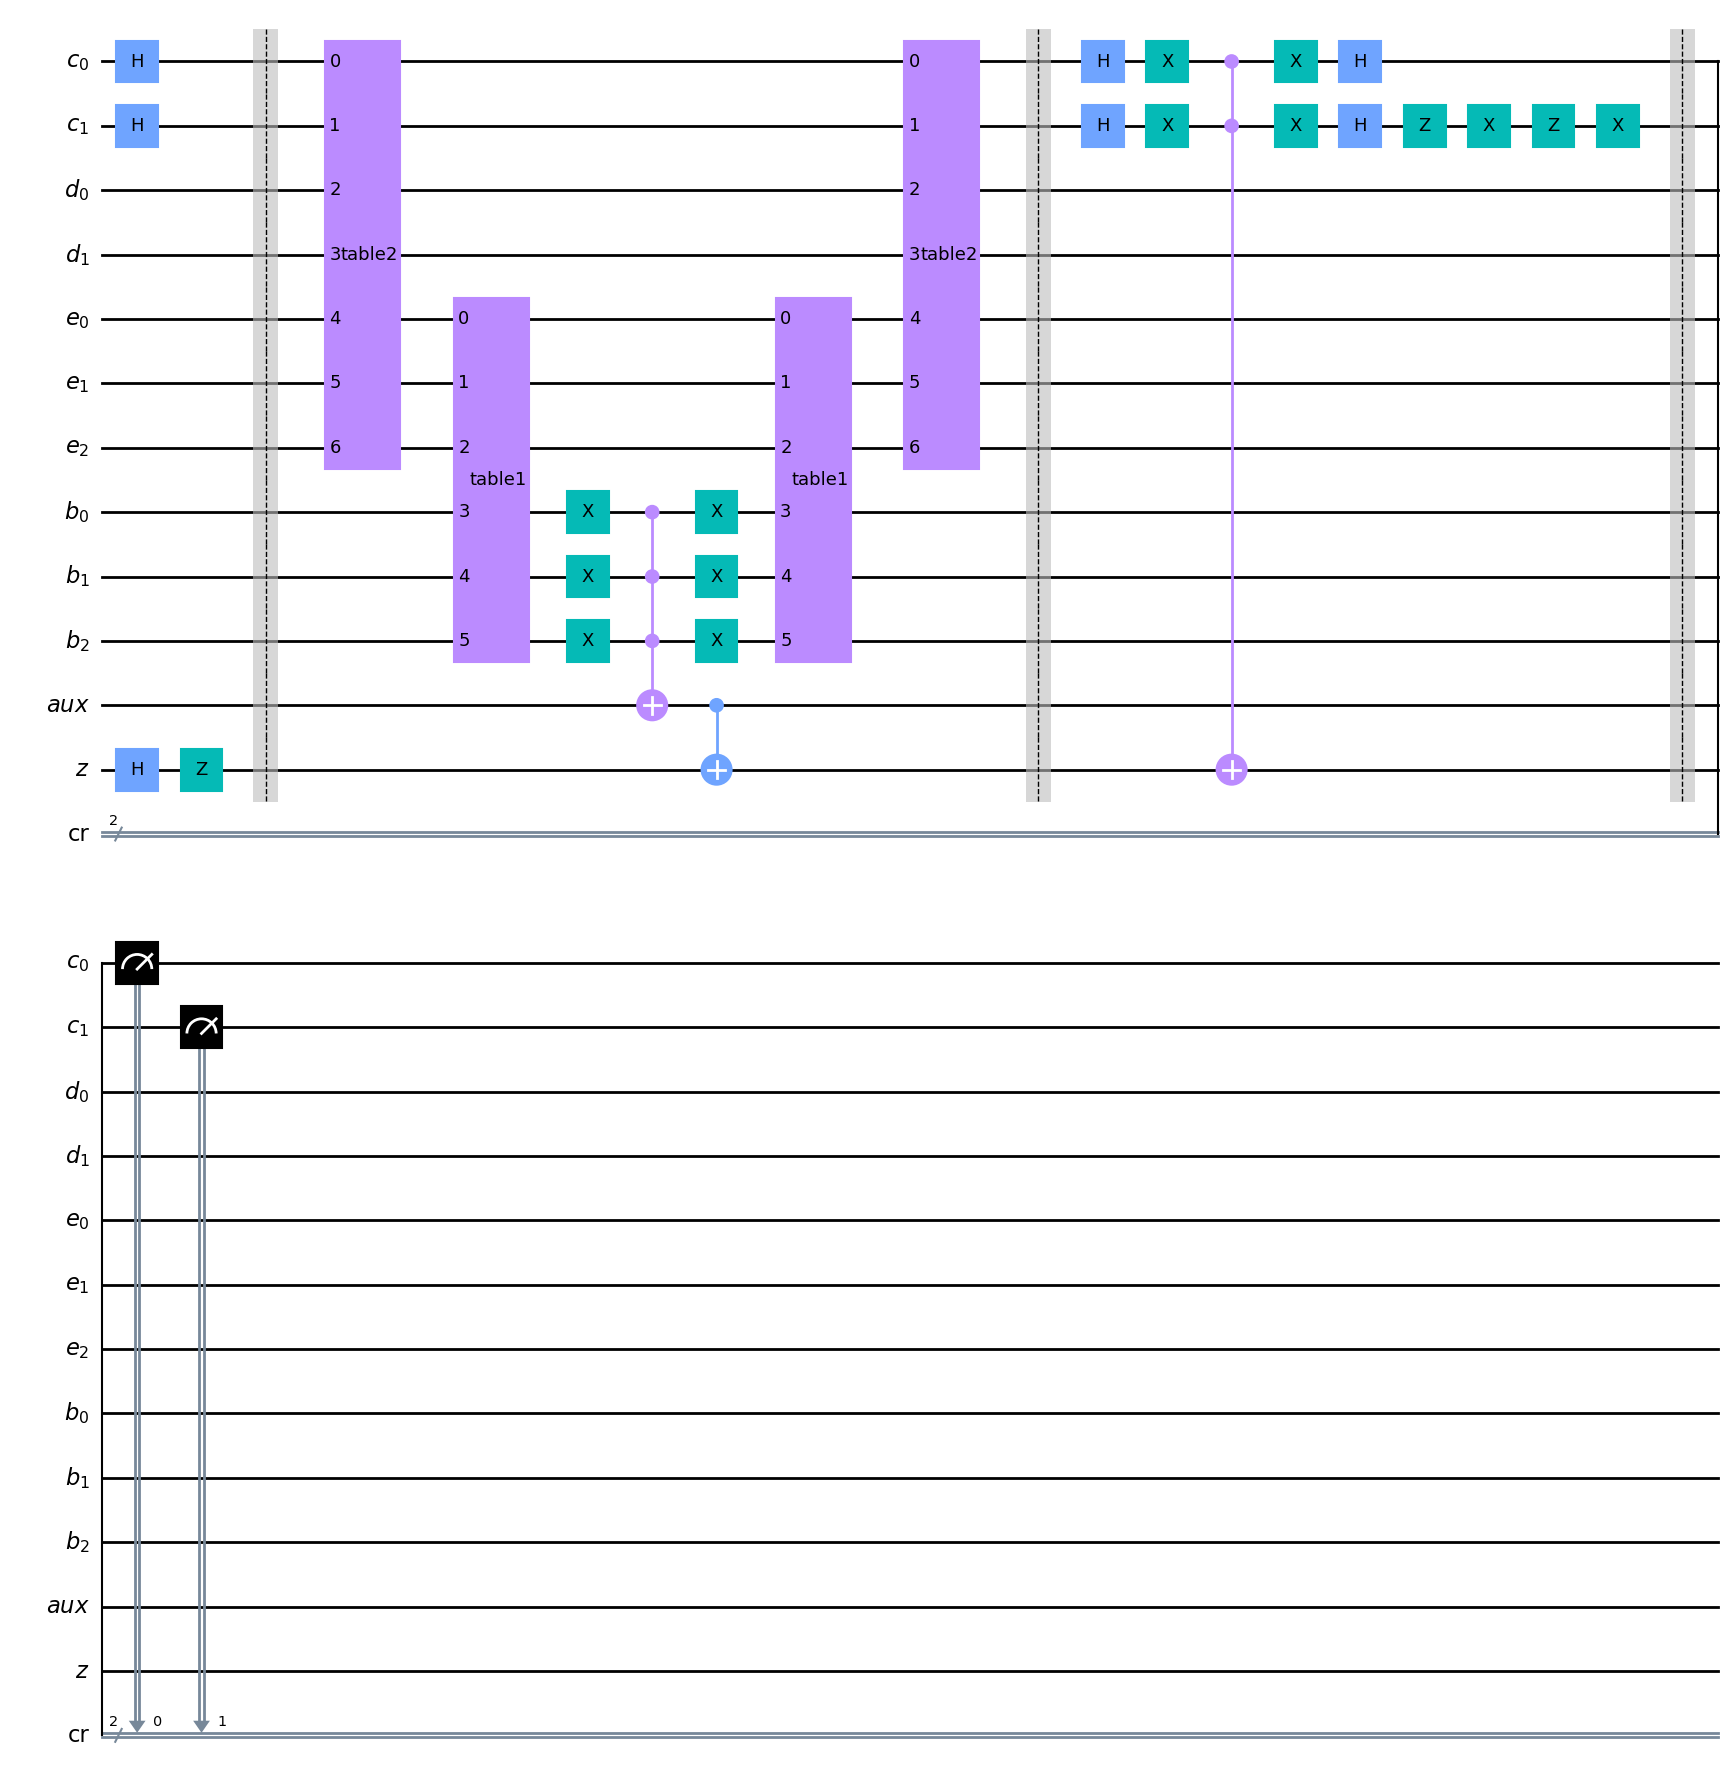

In [17]:
def join(num):
    c = QuantumRegister(2, 'c')
    d = QuantumRegister(2, 'd')
    e = QuantumRegister(3, 'e')
    b = QuantumRegister(3, 'b')
    aux = QuantumRegister(1, 'aux')
    z = QuantumRegister(1, 'z')
    cr = ClassicalRegister(2, 'cr')

    qc = QuantumCircuit(c, d, e, b, aux, z, cr)

    qc.h(z)
    qc.z(z)
    qc.h(c)
    qc.barrier()
    # qc.append(table2, c[:] + d[:] + e[:])
    # qc.append(table1, e[:] + b[:])

    # have to search table 1 first to get the correct binary
    # num2 = search(num, True)
    # print(num2)
    
    M = int(np.floor(np.pi/4 * np.sqrt(2**len(c))))
    binary = bin(num)[2:]
    binary = '0'*(len(b)-len(binary)) + binary
    print(binary)

    for i in range(M):
        qc.append(table2, c[:] + d[:] + e[:])
        qc.append(table1, e[:] + b[:])
        for j in range(len(binary)):
            if binary[j] == '0':
                qc.x(b[len(binary)-j-1])

        qc.mcx(b, aux)

        for j in range(len(binary)):
            if binary[j] == '0':
                qc.x(b[len(binary)-j-1])

            
        qc.append(table1, e[:] + b[:])
        qc.append(table2, c[:] + d[:] + e[:])
        qc.cx(aux, z)
        qc.barrier()

        qc.h(c)
        qc.x(c)
        qc.mcx(c, z)
        qc.x(c)
        qc.h(c)
        qc.z(c[len(c)-1])
        qc.x(c[len(c)-1])
        qc.z(c[len(c)-1])
        qc.x(c[len(c)-1])
        qc.barrier()

    qc.measure(c, cr)
    return qc

joinCircuit = join(0)
joinCircuit.draw(output='mpl')


    

{'10': 131, '00': 116, '01': 656, '11': 121}


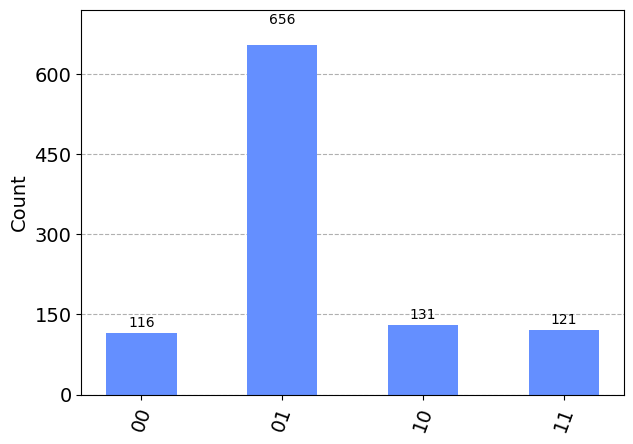

In [18]:
backend = Aer.get_backend('qasm_simulator')
job = execute(joinCircuit, backend, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

000


/home/sum/Documents/QuantumDB/QuantumDB/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


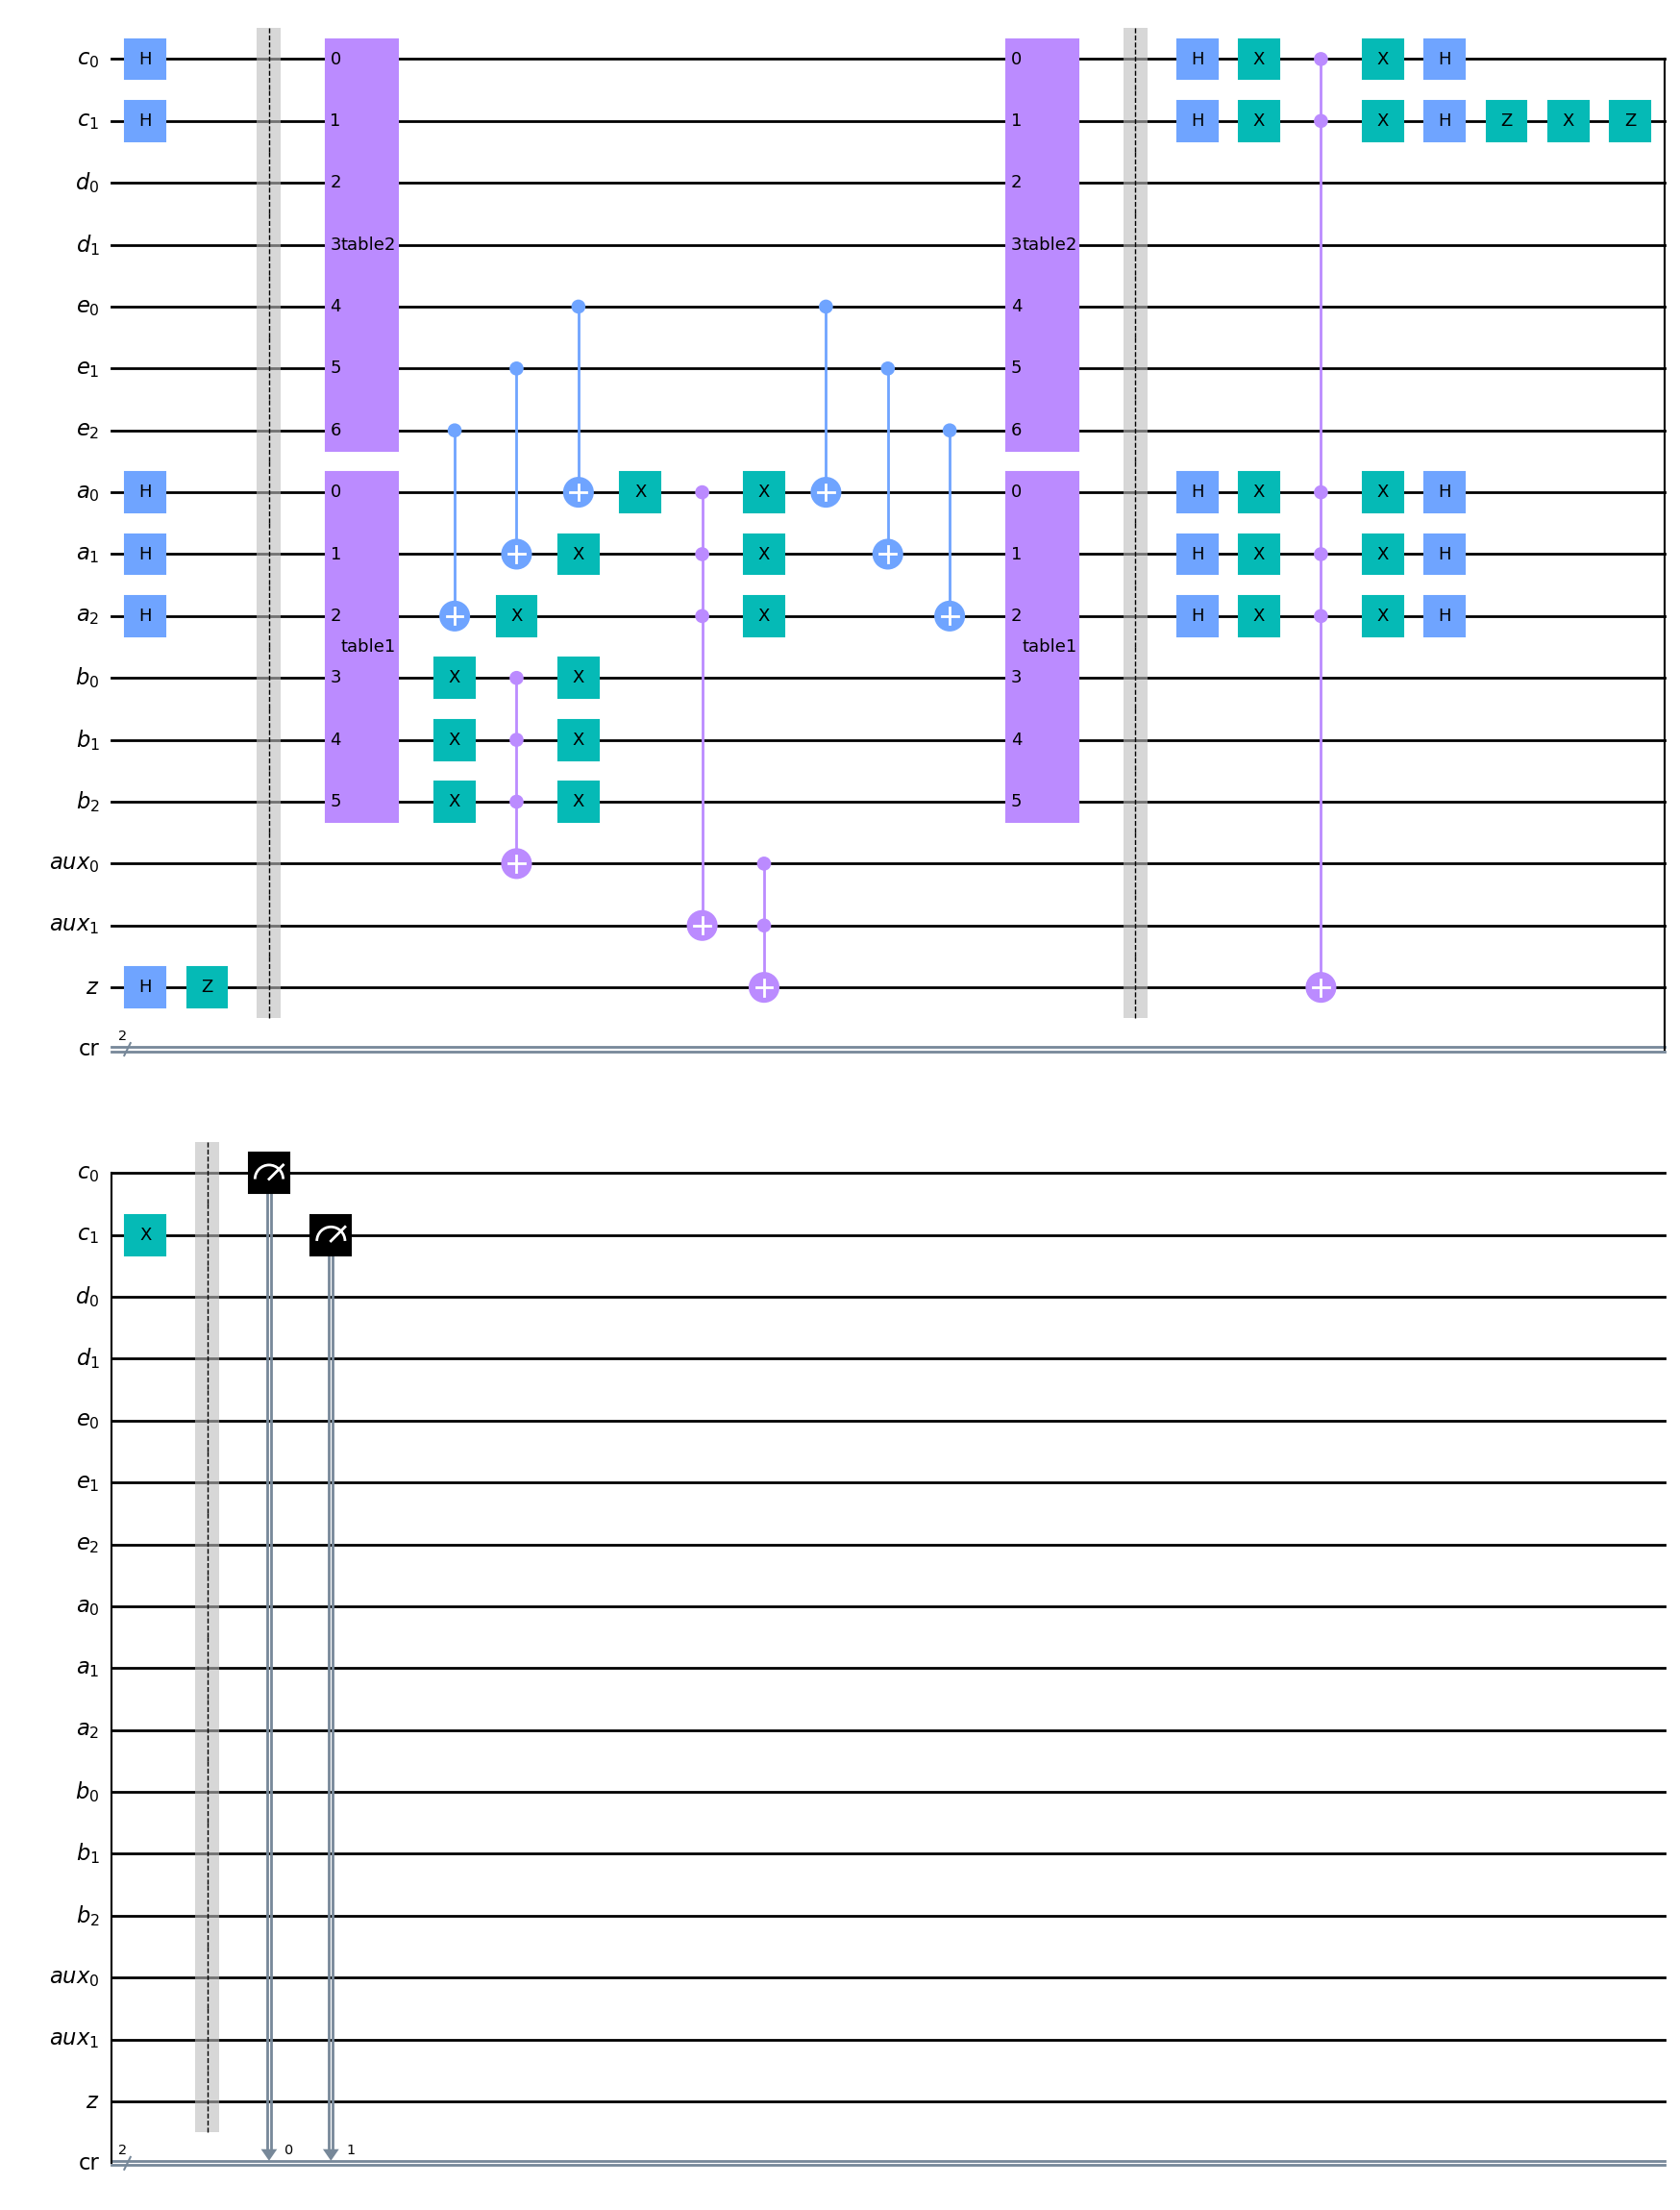

In [13]:
def crossJoin(num):
    c = QuantumRegister(2, 'c')
    d = QuantumRegister(2, 'd')
    e = QuantumRegister(3, 'e')
    a = QuantumRegister(3, 'a')
    b = QuantumRegister(3, 'b')
    aux = QuantumRegister(2, 'aux')
    z = QuantumRegister(1, 'z')
    cr = ClassicalRegister(2, 'cr')

    qc = QuantumCircuit(c, d, e, a, b, aux, z, cr)

    qc.h(z)
    qc.z(z)
    qc.h(c)
    qc.h(a)
    qc.barrier()

    M = int(np.floor(np.pi/4 * np.sqrt(2**len(c))))

    binary = bin(num)[2:]
    binary = '0'*(len(b)-len(binary)) + binary
    print(binary)

    for i in range(M):
        qc.append(table2, c[:] + d[:] + e[:])
        qc.append(table1, a[:] + b[:])
        for j in range(len(binary)):
            if binary[j] == '0':
                qc.x(b[len(binary)-j-1])
        qc.mcx(b, aux[0])
        for j in range(len(binary)):
            if binary[j] == '0':
                qc.x(b[len(binary)-j-1])
        
        qc.cx(e[2], a[2])
        qc.x(a[2])
        qc.cx(e[1], a[1])
        qc.x(a[1])
        qc.cx(e[0], a[0])
        qc.x(a[0])

        qc.mcx(a, aux[1])

        qc.x(a[0])
        qc.cx(e[0], a[0])
        qc.x(a[1])
        qc.cx(e[1], a[1])
        qc.x(a[2])
        qc.cx(e[2], a[2])

        qc.ccx(aux[1], aux[0], z)

        qc.append(table1, a[:] + b[:])
        qc.append(table2, c[:] + d[:] + e[:])

        qc.barrier()

        qc.h(c)
        qc.x(c)
        qc.h(a)
        qc.x(a)
        qc.mcx(c[:] + a[:], z)
        qc.x(c)
        qc.h(c)
        qc.x(a)
        qc.h(a)

        qc.z(c[len(c)-1])
        qc.x(c[len(c)-1])
        qc.z(c[len(c)-1])
        qc.x(c[len(c)-1])
        qc.barrier()

    qc.measure(c, cr)
    return qc

crossJoinCircuit = crossJoin(0)
crossJoinCircuit.draw(output='mpl')


{'11': 276, '00': 270, '10': 285, '01': 193}


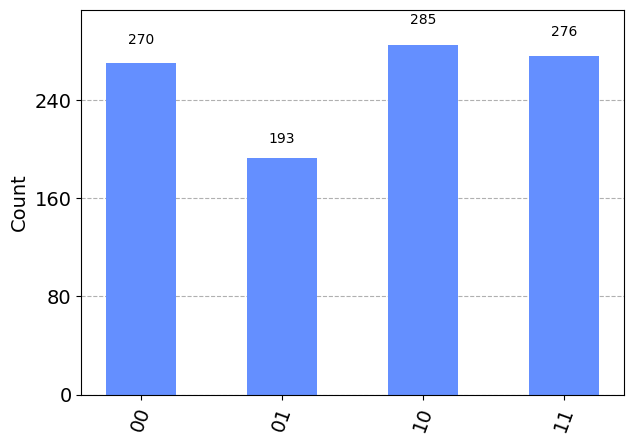

In [14]:
backend = Aer.get_backend('qasm_simulator')
job = execute(crossJoinCircuit, backend, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)